In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv("datasets\winequalityN.csv")

In [21]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [24]:
for col in df.columns: 
    if df[col].isnull().sum() > 0 : 
        df[col] = df[col].fillna(df[col].mean())


In [25]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

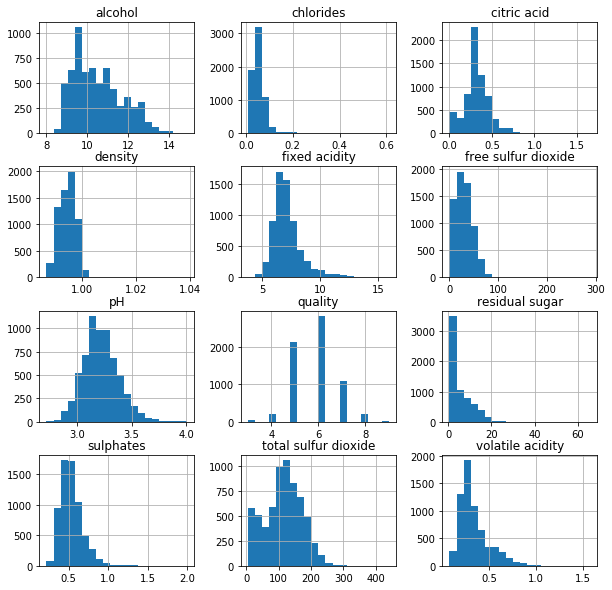

In [26]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

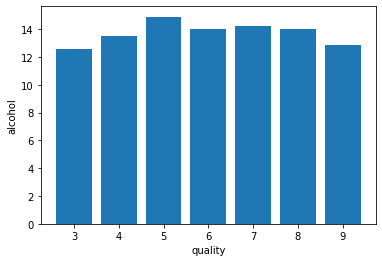

In [27]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

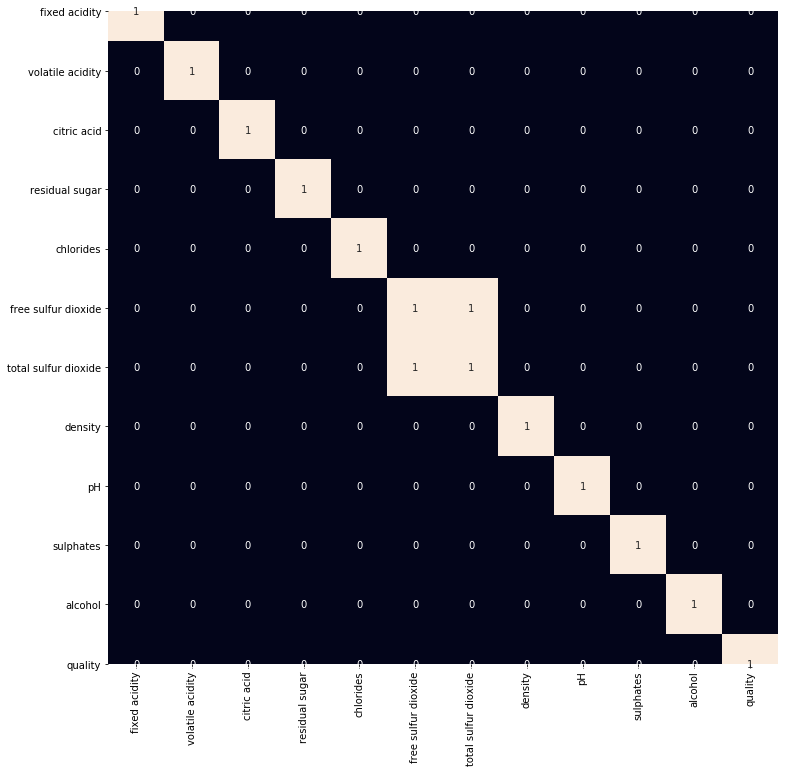

In [28]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [29]:
df = df.drop('total sulfur dioxide', axis=1)

In [30]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [31]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [32]:
features = df.drop(['quality', 'best quality'], axis = 1)
target = df['best quality']

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [34]:
norm = MinMaxScaler() 
xtrain = norm.fit_transform(xtrain) 
xtest = norm.transform(xtest) 

In [35]:
models = [ LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

In [37]:
for model in models : 
    model.fit(xtrain, ytrain) 
    print(f'{model}:')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, model.predict(xtrain)))
    print('Validation Accuracy: ',metrics.roc_auc_score(ytest, model.predict(xtest)) )
    print() 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
Training Accuracy :  0.7021230708948626
Validation Accuracy:  0.694394213381555

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_job

In [53]:
model_names = ['Logistic Regression', 'XGBClassifier', 'Support vectors classifier']

for name, model in zip(model_names, models):
    print('Model: ' + name)
    print(metrics.classification_report(ytest, model.predict(xtest)))
    print('--' * 30 )

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.86      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300

------------------------------------------------------------
Model: XGBClassifier
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       474
           1       0.84      0.87      0.86       826

    accuracy                           0.81      1300
   macro avg       0.80      0.79      0.79      1300
weighted avg       0.81      0.81      0.81      1300

------------------------------------------------------------
Model: Support vectors classifier
              precision    recall  f1-score   support

           0       0.71      0.42      0.53       474
           1       0.73      0.90

In [60]:
df.type.unique()

array([1, 0], dtype=int64)

In [68]:
# slice the pandas dataframe and lets create a wine quality for white and red 
df_white = df[(df.type==1)].drop(['type', 'best quality'], axis=1)
df_red = df[(df.type==0)].drop(['type', 'best quality'], axis=1)

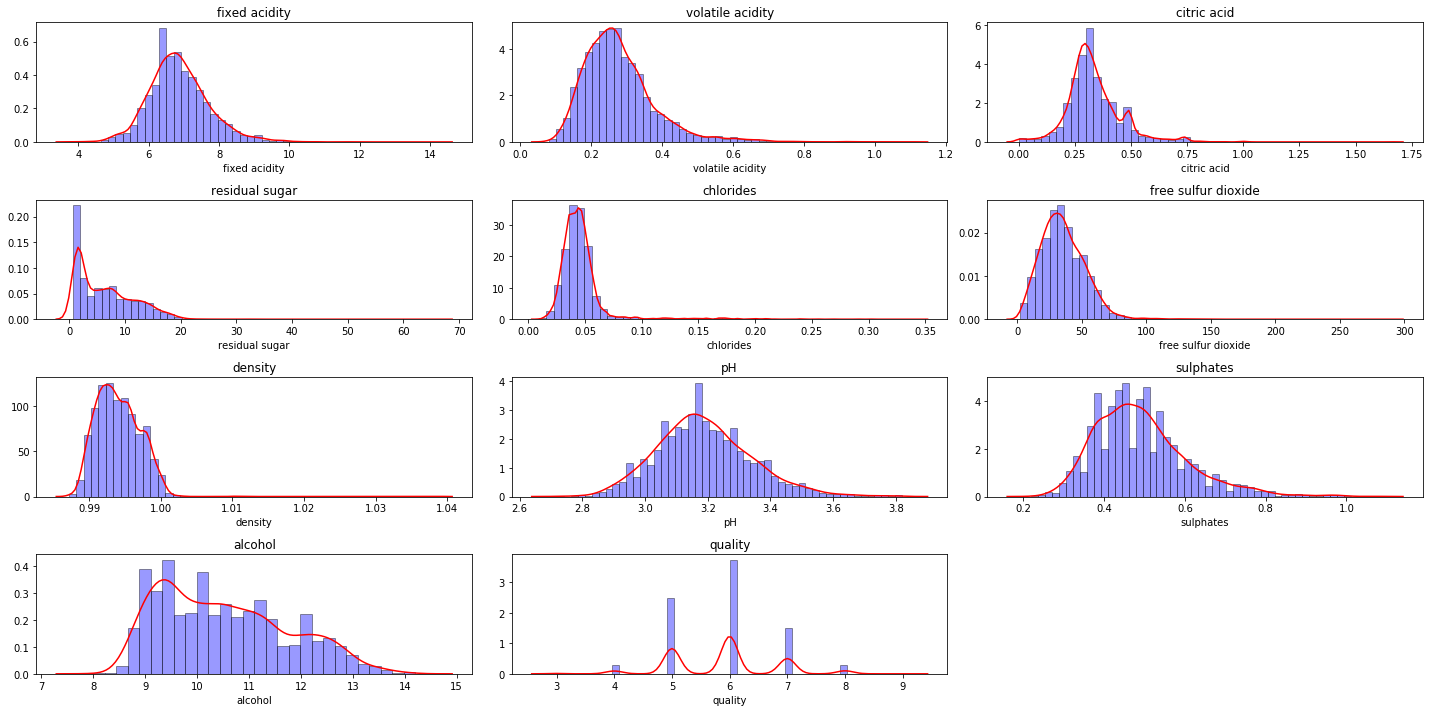

In [69]:
# lets do some eda 
import seaborn as sn
# Assuming df_white is already defined
fig = plt.figure(figsize=[20,10])

# Get the number of columns for subplots
num_cols = len(df_white.columns)

# Calculate the number of rows and columns for subplots dynamically
num_rows = (num_cols - 1) // 3 + 1

for i, col in enumerate(df_white.columns, 1):
    plt.subplot(num_rows, 3, i)
    sn.distplot(df_white[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

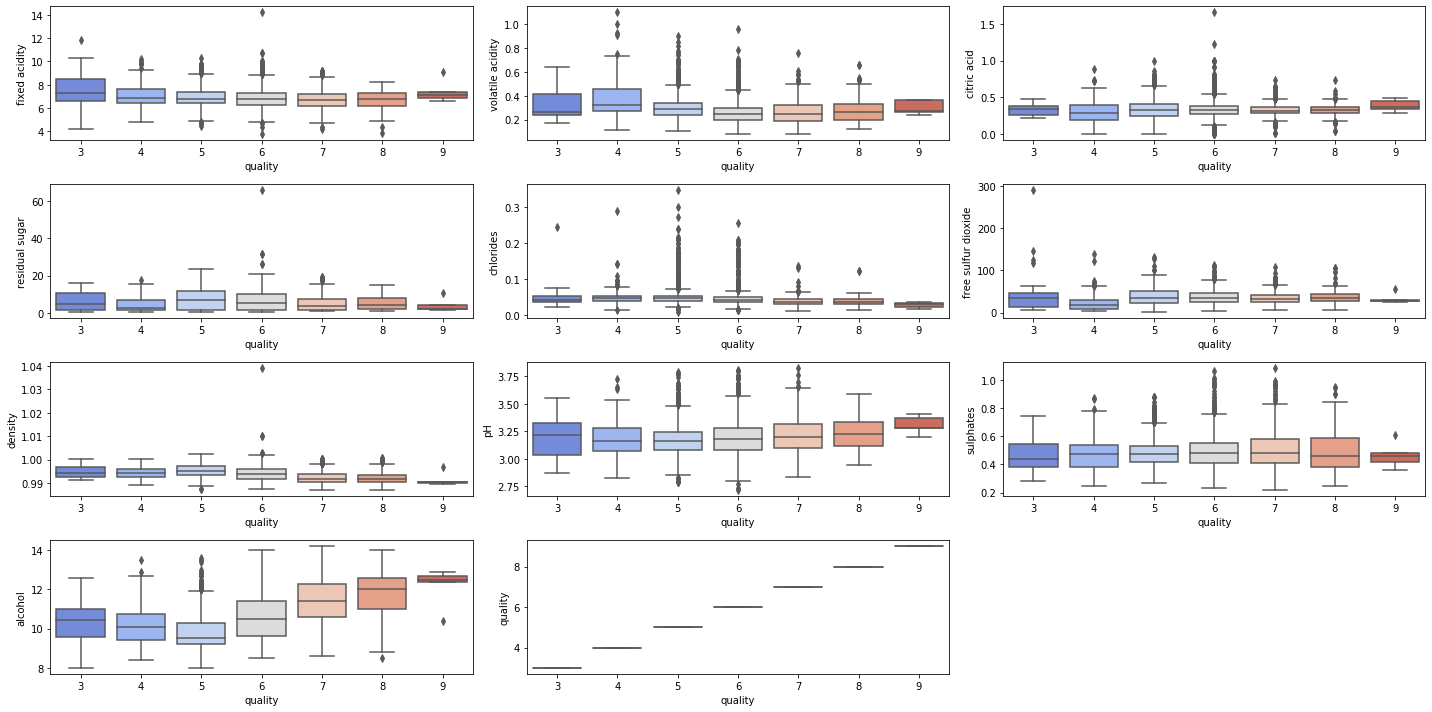

In [74]:
fig = plt.figure(figsize=[20,10])
cols = df_white
count = 1 

for col in cols : 
    plt.subplot(4,3,count)
    sn.boxplot(x="quality", y= col, data= df_white, palette="coolwarm")
    count += 1
plt.tight_layout()
plt.show() 

In [77]:
from sklearn import neighbors
target = df_white.quality
features= df_white.drop(['quality'], axis=1)

In [78]:
xtrain,xtest, ytrain, ytest = train_test_split(features, target, test_size=0.3) 
scaler = MinMaxScaler(feature_range=(0,1))
xtrain = scaler.fit_transform(xtrain) 
xtrain = pd.DataFrame(xtrain) 
xtest = scaler.fit_transform(xtest) 
xtest = pd.DataFrame(xtest)


In [79]:
from sklearn.metrics import mean_squared_error

In [93]:
rms_error = []

for K in range(1, 75):
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    error = mean_squared_error(ytest, pred)
    rms_error.append(error)




In [94]:
x = np.linspace(1,74,74) 
y = rms_error

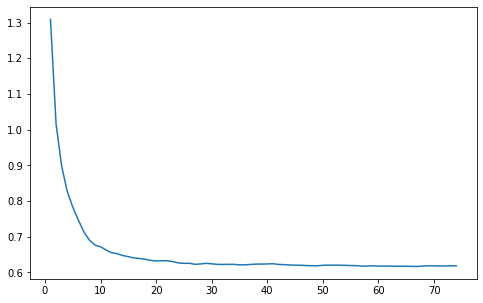

In [95]:
fig, ax = plt.subplots(figsize=[8, 5])
ax.plot(x, y)
plt.show()